In [41]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2341, 142), (586, 142), (2341, 1), (586, 1))

# Neural Network

In [42]:
from sklearn.preprocessing import StandardScaler
from keras import optimizers

st = StandardScaler()
scaled_X_train = st.fit_transform(X_train)

# Model
model = Sequential()
model.add(Dense(142, input_dim=142, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())

model.fit(x=scaled_X_train, y=Y_train, epochs=500)

Epoch 1/500
74/74 [==============================] - 1s 2ms/step - loss: 22.8276
Epoch 2/500
74/74 [==============================] - 0s 2ms/step - loss: 0.8810
Epoch 3/500
74/74 [==============================] - 0s 2ms/step - loss: 0.4835
Epoch 4/500
74/74 [==============================] - 0s 1ms/step - loss: 0.3358
Epoch 5/500
74/74 [==============================] - 0s 1ms/step - loss: 0.2413
Epoch 6/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 7/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1421
Epoch 8/500
74/74 [==============================] - 0s 1ms/step - loss: 0.1117
Epoch 9/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0942
Epoch 10/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0819
Epoch 11/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0678
Epoch 12/500
74/74 [==============================] - 0s 1ms/step - loss: 0.0566
Epoch 13/500
74/74 [================

In [43]:
model.evaluate(scaled_X_train, Y_train)
train_pre = model.predict(scaled_X_train)

74/74 [==============================] - 0s 821us/step


In [44]:
scaled_X_test = st.transform(X_test)
model.evaluate(scaled_X_test, Y_test)
test_pre = model.predict(scaled_X_test)

19/19 [==============================] - 0s 889us/step


Text(0, 0.5, 'Sale_Price')

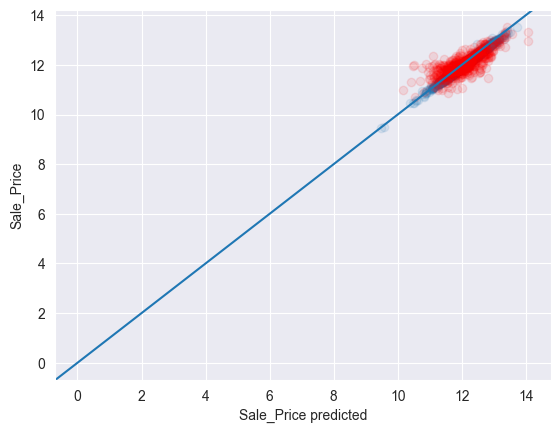

In [45]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots()

axs.plot(train_pre, Y_train, 'o', alpha=0.1)
axs.plot(test_pre, Y_test, 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')